In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pylab as pl

In [2]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [3]:
def gen_cb(N, a, alpha):
    d = np.random.rand(N, 2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha),d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab

[[ 0.65996608  0.47575276]
 [ 0.42394981  0.83025621]
 [ 0.3468575   0.88292512]
 ..., 
 [ 0.2041348   0.99923013]
 [ 0.21645546  0.70799973]
 [ 0.03638565  0.55916325]]
[ 2.  2.  2. ...,  2.  2.  2.]


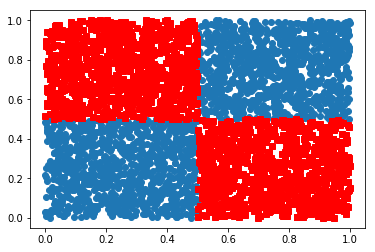

In [4]:
h = .01
X, y = gen_cb(4000, .5, 0)
print(X)
print(y)
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 'o')
plt.plot(X[np.where(y==2)[0], 0], X[np.where(y==2)[0], 1], 's', c = 'r')
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)
plt.show()

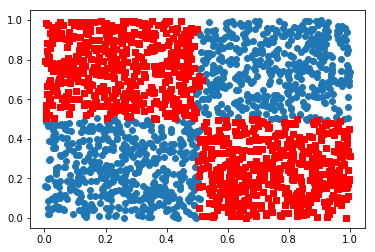

In [5]:
X1, y1 = gen_cb(2000, .5, 0)
y2 = neigh.predict(X1)
plt.plot(X1[np.where(y2==1)[0], 0], X1[np.where(y2==1)[0], 1], 'o')
plt.plot(X1[np.where(y2==2)[0], 0], X1[np.where(y2==2)[0], 1], 's', c = 'r')
plt.show()

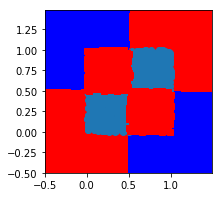

In [6]:
x_min, x_max = X1[:,0].min() - .5, X1[:,0].max() + .5
y_min, y_max = X1[:,1].min() - .5, X1[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(3, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z, cmap=cmap_bold)
plt.plot(X1[np.where(y2==1)[0], 0], X1[np.where(y2==1)[0], 1], 'o')
plt.plot(X1[np.where(y2==2)[0], 0], X1[np.where(y2==2)[0], 1], 's', c = 'r')
pl.show()